# Regression Modeling

### Section 1

A dataset called 'cancer.csv'(1) is included with this assessment. This data set contains data regarding the cancer death rate in different US counties aggregated from a number of sources including the American Community Survey (census.gov), clinicaltrials.gov, and cancer.gov. Load the 'cancer.csv' dataset, examine the data and make any necessary cleaning and/or transformations required to fit a linear model explaining the cancer death rate in different US counties.

In your LaTeX document, explain and justify any modifications you made to the data such that another person could repeat the same analysis. Use plain English and formulae rather than referring to python commands. Include figures which illustrate the suitability of the potential explanatory variables for a linear model of fuel efficiency, in your LaTeX document.


|Data dictionary:|  |
|----|---------------------------------------------------|
|deathRate| Dependent variable. Mean per capita (100,000) cancer mortalities(a)|
|incidenceRate| Mean per capita (100,000) cancer diagoses(a)|
|medianIncome| Median income per county (b)|
|popEst2015| Population of county (b)|
|povertyPercent| Percent of populace in poverty (b)|
|studyPerCap| Per capita number of cancer-related clinical trials per county (a)|
|binnedInc| Median income per capita binned by decile (b)|
|MedianAge| Median age of county residents (b)|
|MedianAgeMale| Median age of male county residents (b)|
|MedianAgeFemale| Median age of female county residents (b)|
|AvgHouseholdSize| Mean household size of county (b)|
|PercentMarried| Percent of county residents who are married (b)|
|PctNoHS18_24| Percent of county residents ages 18-24 highest education attained: less than high school (b)|
|PctBachDeg25_Over| Percent of county residents ages 25 and over highest education attained| bachelor's degree (b)|
|PctMarriedHouseholds| Percent of married households (b)|
|BirthRate| Number of live births relative to number of women in county (b)|
|modeEdu| Most frequent value in highest education attained by county residents ages 18-24|
|modeHI| Most frequent value in healthcare coverage for county residents|
|IDW| Percentage of county residents identifying as "White" binned by quartile|




(1) Modified from N. Rippner, S. Burnett (2016) OLS Regression Challenge. Accessed from https://data.world/nrippner/ols-regression-challenge 
(a) years 2010-2016
(b) 2013 Census Estimates

In [3]:
%matplotlib inline
%run setup.py

import pandas as pd
from scipy import stats
import seaborn as sns

cancer_df = pd.read_csv('cancer.csv', index_col=0)
cancer_df

,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,MedianAgeMale,MedianAgeFemale,AvgHouseholdSize,PercentMarried,PctMarriedHouseholds,BirthRate,deathRate,modeEdu18_24,PctNoHS18_24,PctBachDeg25_Over,modeHI,IDW
1,489.800000,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,36.9,41.7,2.54,52.5,52.856076,6.118831,164.9,SomeCol18_24,11.5,19.6,PrivateCoverage,77to90
2,411.600000,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,32.2,33.7,2.34,44.5,45.372500,4.333096,161.3,SomeCol18_24,6.1,22.7,PrivateCoverage,77to90
3,349.700000,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,44.0,45.8,2.62,54.2,54.444868,3.729488,174.7,HS18_24,24.0,16.0,PrivateCoverage,90to95
4,430.400000,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,42.2,43.4,2.52,52.7,51.021514,4.603841,194.8,HS18_24,20.2,9.3,PrivateCoverage,90to95
5,350.100000,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,47.8,48.9,2.34,57.8,54.027460,6.796657,144.4,HS18_24,14.9,15.0,PrivateCoverage,90to95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3043,453.549422,46961,6343,12.4,0.000000,"(45201, 48021.6]",44.2,41.1,48.8,2.08,51.0,51.063830,7.773512,149.6,HS18_24,20.9,15.2,PrivateCoverage,90to95
3044,453.549422,48609,37118,18.8,377.175494,"(48021.6, 51046.4]",30.4,29.3,31.4,2.90,52.6,52.007937,8.186470,150.1,SomeCol18_24,26.7,12.4,PrivateCoverage,Lt77
3045,453.549422,51144,34536,15.0,1968.959926,"(51046.4, 54545.6]",30.9,30.5,31.2,3.04,54.8,55.153949,7.809192,153.9,HS18_24,19.7,12.8,PrivateCoverage,77to90
3046,453.549422,50745,25609,13.3,0.000000,"(48021.6, 51046.4]",39.0,36.9,40.5,2.56,58.8,58.484232,7.582938,175.0,HS18_24,10.9,14.4,PrivateCoverage,90to95


In [4]:
cancer_df.describe(include='all')

,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,MedianAgeMale,MedianAgeFemale,AvgHouseholdSize,PercentMarried,PctMarriedHouseholds,BirthRate,deathRate,modeEdu18_24,PctNoHS18_24,PctBachDeg25_Over,modeHI,IDW
count,3047.000000,3047.000000,3.047000e+03,3047.000000,3047.000000,3047,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047,3047.000000,3047.000000,3047,3047
unique,NaN,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,2,4
top,NaN,NaN,NaN,NaN,NaN,"[22640, 34218.1]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HS18_24,NaN,NaN,PrivateCoverage,95to100
freq,NaN,NaN,NaN,NaN,NaN,306,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2393,NaN,NaN,2878,837
mean,448.268586,47063.281917,1.026374e+05,16.878175,155.399415,NaN,45.272333,39.570725,42.145323,2.479662,51.773679,51.243872,5.640306,178.664063,NaN,18.224450,13.282015,NaN,NaN
std,54.560733,12040.090836,3.290592e+05,6.409087,529.628366,NaN,45.304480,5.226017,5.292849,0.429174,6.896928,6.572814,1.985816,27.751511,NaN,8.093064,5.394756,NaN,NaN
min,201.300000,22640.000000,8.270000e+02,3.200000,0.000000,NaN,22.300000,22.400000,22.300000,0.022100,23.100000,22.992490,0.000000,59.700000,NaN,0.000000,2.500000,NaN,NaN
25%,420.300000,38882.500000,1.168400e+04,12.150000,0.000000,NaN,37.700000,36.350000,39.100000,2.370000,47.750000,47.763063,4.521419,161.200000,NaN,12.800000,9.400000,NaN,NaN
50%,453.549422,45207.000000,2.664300e+04,15.900000,0.000000,NaN,41.000000,39.600000,42.400000,2.500000,52.400000,51.669941,5.381478,178.100000,NaN,17.100000,12.300000,NaN,NaN
75%,480.850000,52492.000000,6.867100e+04,20.400000,83.650776,NaN,44.000000,42.500000,45.300000,2.630000,56.400000,55.395132,6.493677,195.200000,NaN,22.700000,16.100000,NaN,NaN


### Initial Comments
It can be seen that there doesn't appear to be any missing data in the table above. We can howver present some inital thoughts with the linked variables. Incidence rate must have a significant corelation with the death rate. Factors such as population size and birthrate should not affect the death rate of cancer. A lot of the data entries in the studyperCap appear to be $0$ since the more than the $50 \%$ quartile is $0$. This also makes sense since such many countries wont have research or clinical trials for such studies. It can also be seen that the maximum median age is 624 which is practically impossible, hence another error in data entry which could be an entry supposed to be in months. Last but not the least, it is not possible to have a household of less than $1$ member, hence those data points need to be removed.

In [5]:
cat_vars = ['binnedInc','modeEdu18_24','modeHI','IDW'] # categorical variables 

cancer_df.loc[:,~cancer_df.columns.isin(cat_vars)].corr() # correlation coeffecints
                                                          # between the rest of the variables

,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,MedianAgeFemale,AvgHouseholdSize,PercentMarried,PctMarriedHouseholds,BirthRate,deathRate,PctNoHS18_24,PctBachDeg25_Over
incidenceRate,1.000000,-0.001036,0.026912,0.009046,0.077283,0.018089,-0.014733,-0.009106,-0.118400,-0.119524,-0.152176,-0.118181,0.449432,-0.170762,-0.038177
medIncome,-0.001036,1.000000,0.235523,-0.788965,0.044003,-0.013288,-0.091663,-0.153278,0.112065,0.355123,0.446083,-0.010195,-0.428615,-0.289383,0.704928
popEst2015,0.026912,0.235523,1.000000,-0.065299,0.055722,-0.025219,-0.176608,-0.177932,0.109940,-0.160463,-0.127979,-0.057740,-0.120073,-0.126582,0.297463
povertyPercent,0.009046,-0.788965,-0.065299,1.000000,-0.055652,-0.029280,-0.214001,-0.148164,0.074308,-0.642857,-0.604953,-0.012283,0.429389,0.288106,-0.531600
studyPerCap,0.077283,0.044003,0.055722,-0.055652,1.000000,-0.026030,-0.036647,-0.030577,-0.004071,-0.038143,-0.051736,0.010676,-0.022285,-0.090387,0.108594
MedianAge,0.018089,-0.013288,-0.025219,-0.029280,-0.026030,1.000000,0.129119,0.124678,-0.031944,0.046372,0.014504,-0.008276,0.004375,0.006178,-0.020352
MedianAgeMale,-0.014733,-0.091663,-0.176608,-0.214001,-0.036647,0.129119,1.000000,0.933696,-0.343189,0.449986,0.222278,-0.104105,-0.021929,0.100486,-0.131599
MedianAgeFemale,-0.009106,-0.153278,-0.177932,-0.148164,-0.030577,0.124678,0.933696,1.000000,-0.367585,0.375208,0.161507,-0.098813,0.012048,0.136361,-0.180845
AvgHouseholdSize,-0.118400,0.112065,0.109940,0.074308,-0.004071,-0.031944,-0.343189,-0.367585,1.000000,-0.100512,0.091450,0.075918,-0.036905,0.064719,0.013918
PercentMarried,-0.119524,0.355123,-0.160463,-0.642857,-0.038143,0.046372,0.449986,0.375208,-0.100512,1.000000,0.870261,0.141404,-0.266820,-0.012375,0.103585


MedianAgeMale and Female, MedianAge and average household size are highly corelated to each other which does make sense to a certain content. There is no real reason for including population size and birth rate in a model for cancer death rate which is also highly evident by the corelation coeffecient between deathrate and the $2$ variables.

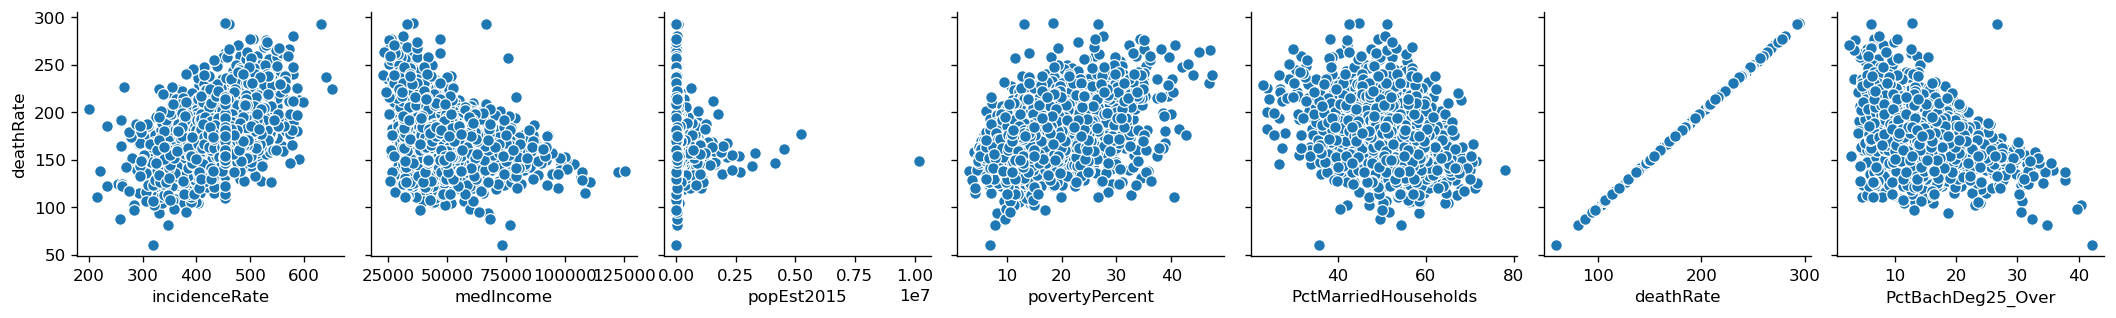

In [8]:
un_vars = ['studyPerCap','MedianAge','MedianAgeMale','MedianAgeFemale',
                         'PercentMarried','AvgHouseholdSize','BirthRate','PctNoHS18_24','binnedInc',
                         'modeEdu18_24','modeHI','IDW'] # non-categorical variables

# Plot of the data
pp = sns.pairplot(data=cancer_df,
                  y_vars=['deathRate'],
                  x_vars=cancer_df.loc[:,~cancer_df.columns.isin(un_vars)].corr())

In [9]:
# converting the months to years for median age
cancer_df.loc[cancer_df.MedianAge>100,'MedianAge'] = cancer_df.loc[cancer_df.MedianAge>100,'MedianAge']/12 

# dropping erroneous data points
cancer_df.drop(cancer_df[(cancer_df.incidenceRate > 750) | (cancer_df.AvgHouseholdSize < 1)].index, inplace=True)

cancer_df.describe()

,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,MedianAgeFemale,AvgHouseholdSize,PercentMarried,PctMarriedHouseholds,BirthRate,deathRate,PctNoHS18_24,PctBachDeg25_Over
count,2984.000000,2984.000000,2.984000e+03,2984.000000,2984.000000,2984.000000,2984.000000,2984.000000,2984.000000,2984.000000,2984.000000,2984.000000,2984.000000,2984.000000,2984.000000
mean,447.466650,47117.527145,1.035399e+05,16.865147,156.768178,40.825570,39.567225,42.147621,2.529839,51.806535,51.269165,5.649691,178.524564,18.196816,13.316521
std,51.442693,12092.549917,3.320695e+05,6.428914,534.407316,5.201545,5.236326,5.295375,0.249729,6.876790,6.558231,1.993510,27.509905,8.031959,5.407844
min,201.300000,22640.000000,8.270000e+02,3.200000,0.000000,22.300000,22.400000,22.300000,1.860000,23.100000,22.992490,0.000000,59.700000,0.000000,2.500000
25%,420.075000,38893.000000,1.169350e+04,12.100000,0.000000,37.700000,36.300000,39.100000,2.370000,47.800000,47.819847,4.528808,161.100000,12.775000,9.400000
50%,453.549422,45233.500000,2.684350e+04,15.800000,0.000000,40.900000,39.500000,42.300000,2.500000,52.450000,51.699330,5.383805,178.000000,17.150000,12.300000
75%,480.225000,52535.250000,6.880625e+04,20.400000,83.796343,43.900000,42.600000,45.400000,2.640000,56.400000,55.401921,6.527684,195.125000,22.700000,16.100000
max,651.300000,125635.000000,1.017029e+07,47.400000,9762.308998,65.300000,64.700000,65.700000,3.970000,72.500000,78.075397,21.326165,293.900000,64.100000,42.200000


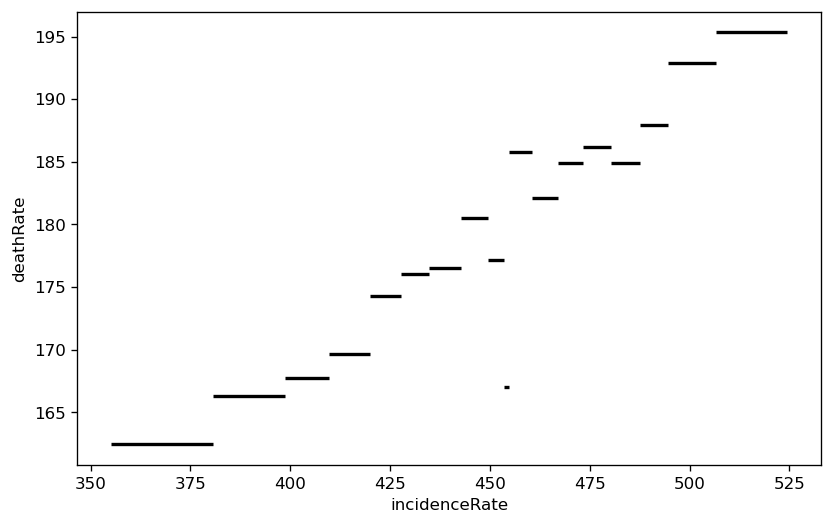

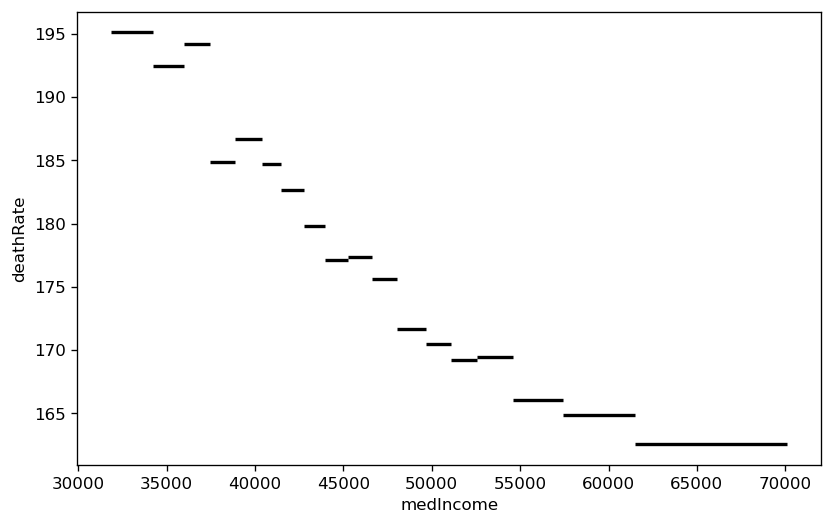

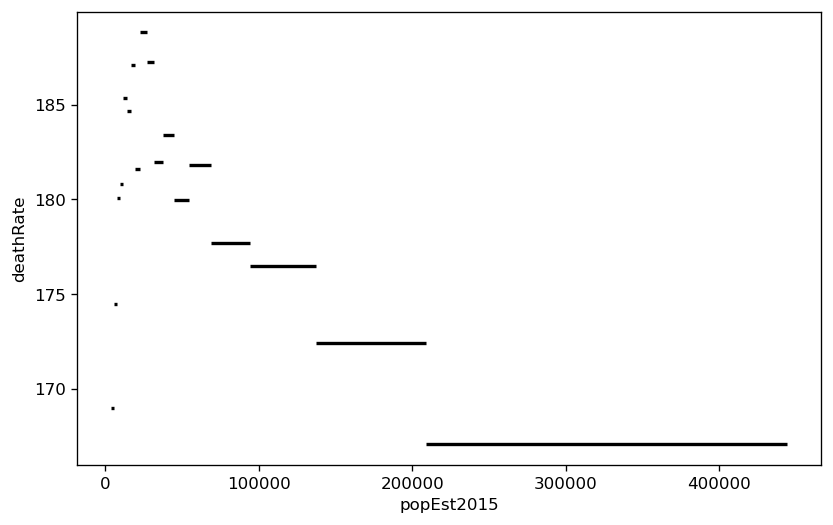

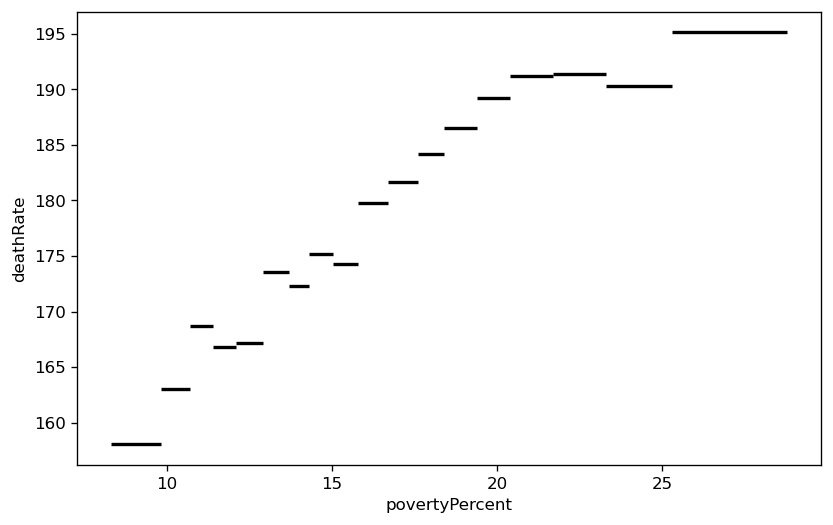

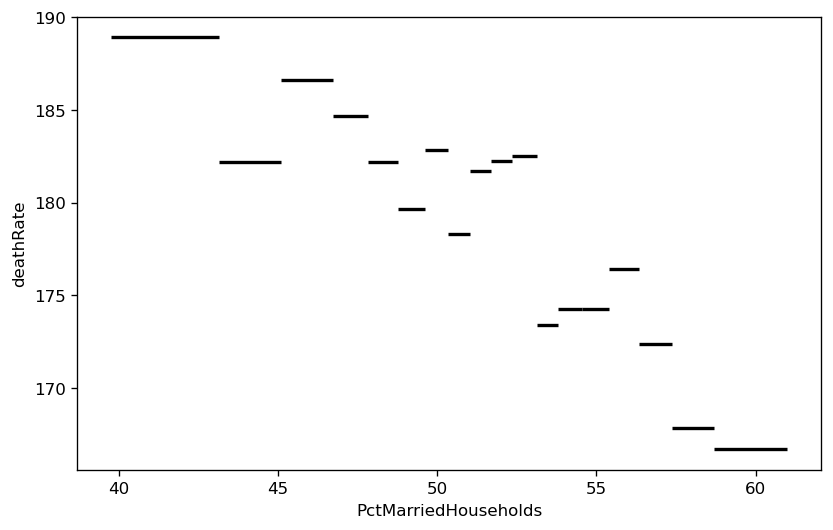

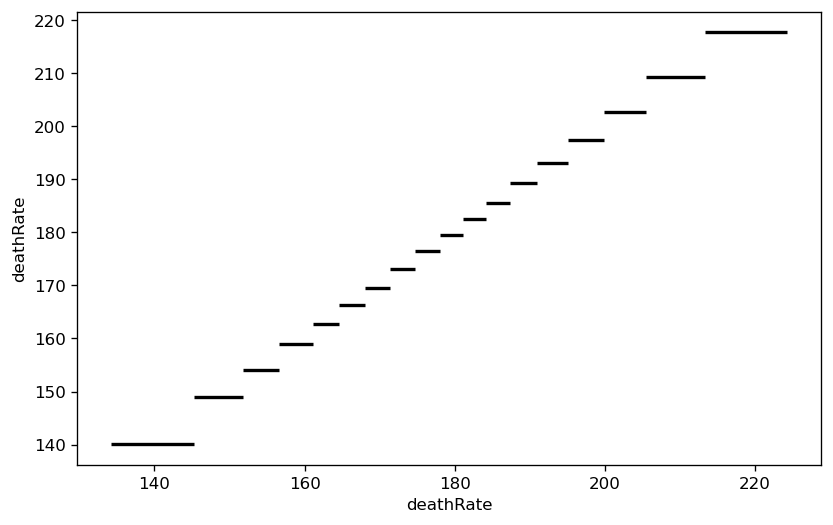

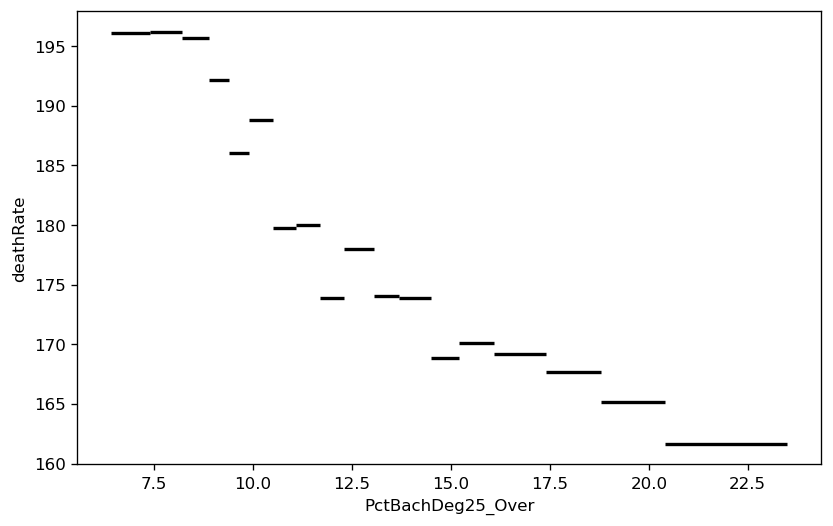

incidenceRate           None
medIncome               None
popEst2015              None
povertyPercent          None
PctMarriedHouseholds    None
deathRate               None
PctBachDeg25_Over       None
dtype: object

In [13]:
def binned_stats(var):
    bin_means, bin_edges, binnumber = stats.binned_statistic(var,
                       cancer_df.deathRate,
                       statistic='mean', 
                       bins=np.quantile(var,np.arange(0.05,1,0.05)))
    plt.hlines(bin_means, bin_edges[:-1], bin_edges[1:])
    plt.xlabel(var.name)
    plt.ylabel('deathRate')
    plt.show()

cancer_df.loc[:,~cancer_df.columns.isin(un_vars)].apply(binned_stats,axis=0)

* Incidence rate, as expected, has a positive relationship with death rate.
* We can see that a logistic transformation might be more suitable to establish a linear relationship between the variable "PctBachDeg25_Over" and death rate.
* Similarly, a quadratic transformation should be used for the variable "PopEst2015" to account for the pattern observed in the plots.

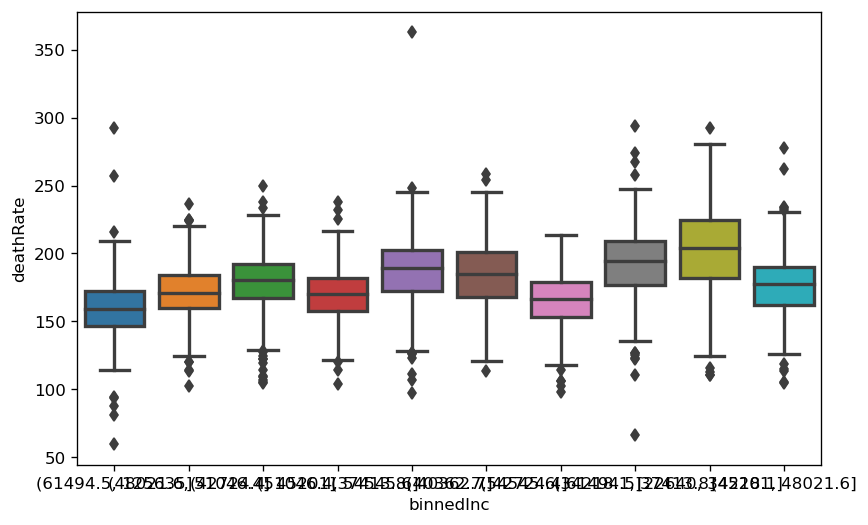

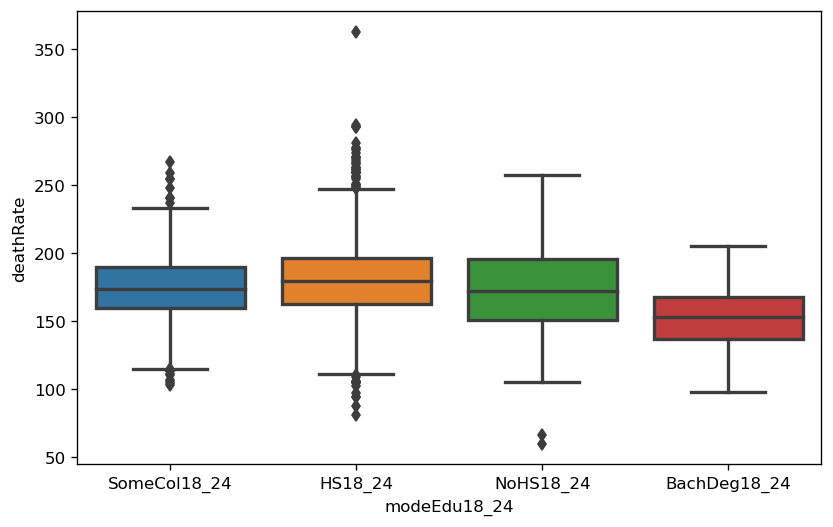

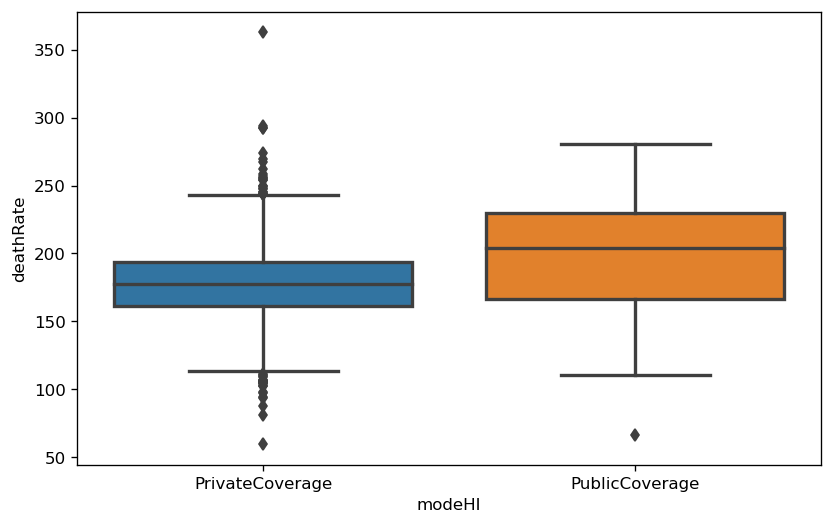

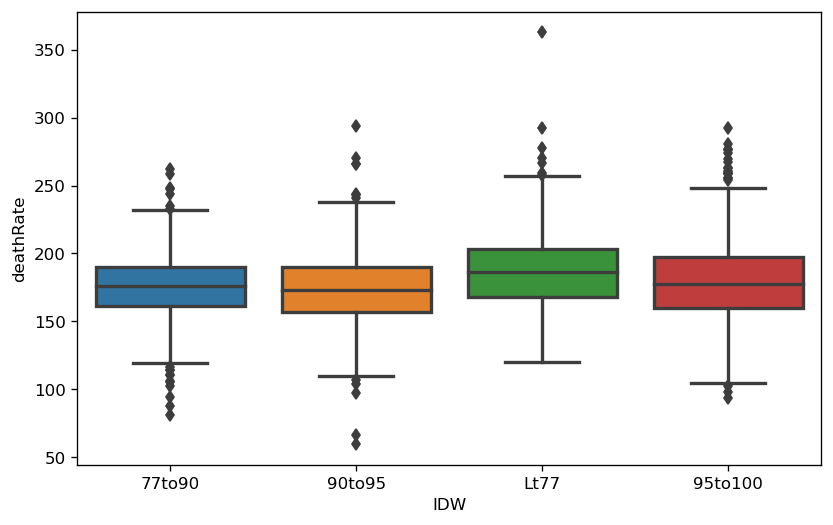

In [17]:
for var in cancer_df.loc[:,cat_vars]:
    plt.figure()
    sns.boxplot(x=var, y="deathRate", data=cancer_df)

From the boxplots, IDW and insurance coverage do not provide sufficeient evidence of corelation. It should also be noted that countries with more wealth are doing much better thabn the others.

### Section 2

We now create an explanatory data matrix and fit a linear regression model, examining the suitability of our chosen model.

We need to take into account the effect of the categorical variables too. So we will use the dummy coding to integrate those variables into our model.
The code for variable "modeHI" for example
registers the value $1$ whenever a dataset with modeHI as private coverage comes, and as $0$ when a dataset with modeHI as public coverage comes i.e the column vector.
\begin{equation*}
    \text{modeHI}_i = 
\begin{cases}
1 & \text {if cover of healthcare $i$ is Private coverage} \\
0 & \text {if cover of healthcare $i$ is Public coverage}
\end{cases}
\end{equation*}
The same algorithm applies to the other column vectors of the categorical variables and then adding them to the existing data.

The explanatory matrix $\textbf{X}$ then consists of
\begin{equation*}
\textbf{X} = \begin{pmatrix} \mathbf{1}\\
                                 \text{Incidence rate} \\
                                 \text{median income} \\
                                 \text{log(pctBachDeg25\_over)}\\
                                 \text{poverty percent}\\
                                 \text{percent married households}\\
                                 (\text{popEst2015})^2\\
                                 \text{binnedInc\_1}\\
                                 \vdots\\
                                 \text{binnedInc\_10}\\
                                 \text{modeEdu18\_24\_SC}\\
                                 \vdots\\
                                 \text{modeEdu18\_24\_BCDG}\\
                                 \text{modeHI\_prv8cvr}\\
                                 \text{modeHI\_pblccvr}\\
                                 \text{IDW\_77-90}\\
                                 \vdots\\
                                 \text{IDW\_95-100}
                                 \end{pmatrix}^T
\end{equation*}
and our regression model looks like
\begin{equation}{\label{1}}
    \mathbf{\hat{y}} = \textbf{X} \boldsymbol{\beta}
\end{equation}
where $\boldsymbol{\beta}$ consists of coefficients like
\begin{equation*}
\begin{pmatrix}
\beta_0\\
\beta_1\\
\vdots\\
\beta_n
\end{pmatrix}
\end{equation*}

In [18]:
# dummy coding to create indicator arrays for the categorical variables

cancer_df['binnedInc_1'] = (cancer_df.binnedInc == "[22640, 34218.1]").astype(int)
cancer_df['binnedInc_2'] = (cancer_df.binnedInc == "(34218.1, 37413.8]").astype(int)
cancer_df['binnedInc_3'] = (cancer_df.binnedInc == "(37413.8, 40362.7]").astype(int)
cancer_df['binnedInc_4'] = (cancer_df.binnedInc == "(40362.7, 42724.4]").astype(int)
cancer_df['binnedInc_5'] = (cancer_df.binnedInc == "(42724.4, 45201]").astype(int)
cancer_df['binnedInc_6'] = (cancer_df.binnedInc == "(45201, 48021.6]").astype(int)
cancer_df['binnedInc_7'] = (cancer_df.binnedInc == "(48021.6, 51046.4]").astype(int)
cancer_df['binnedInc_8'] = (cancer_df.binnedInc == "(51046.4, 54545.6]").astype(int)
cancer_df['binnedInc_9'] = (cancer_df.binnedInc == "(54545.6, 61494.5]").astype(int)
cancer_df['binnedInc_10'] = (cancer_df.binnedInc == "(61494.5, 125635]").astype(int)

cancer_df['modeEdu18_24_SC'] = (cancer_df.modeEdu18_24 == "SomeCol18_24").astype(int)
cancer_df['modeEdu18_24_HS'] = (cancer_df.modeEdu18_24 == "HS18_24").astype(int)
cancer_df['modeEdu18_24_noHS'] = (cancer_df.modeEdu18_24 == "NOHS18_24").astype(int)
cancer_df['modeEdu18_24_BCDG'] = (cancer_df.modeEdu18_24 == "BachDeg18_24").astype(int)

cancer_df['modeHI_prv8cvr'] = (cancer_df.modeHI == "PrivateCoverage").astype(int)
cancer_df['modeHI_pblccvr'] = (cancer_df.modeHI == "PublicCoverage").astype(int)

cancer_df['IDW_77-90'] = (cancer_df.IDW == "77to90").astype(int)
cancer_df['IDW_90-95'] = (cancer_df.IDW == "90to95").astype(int)
cancer_df['IDW_lt77'] = (cancer_df.IDW == "Lt77").astype(int)
cancer_df['IDW_95-100'] = (cancer_df.IDW == "95to100").astype(int)

In [19]:
cancer_df2 = cancer_df.copy() 
cancer_df2.drop(columns=['deathRate','studyPerCap','MedianAge','MedianAgeMale','MedianAgeFemale',
                         'PercentMarried','AvgHouseholdSize','BirthRate','PctNoHS18_24','binnedInc',
                         'modeEdu18_24','modeHI','IDW'],axis=0,inplace=True)

cancer_df2['log_PctBachDeg25_Over'] = np.log(cancer_df2.PctBachDeg25_Over) # Log transformation of PctBachDeg25
cancer_df2['popEst2015^2'] = cancer_df.popEst2015**2 # Quadratic transformation of PopEst2015

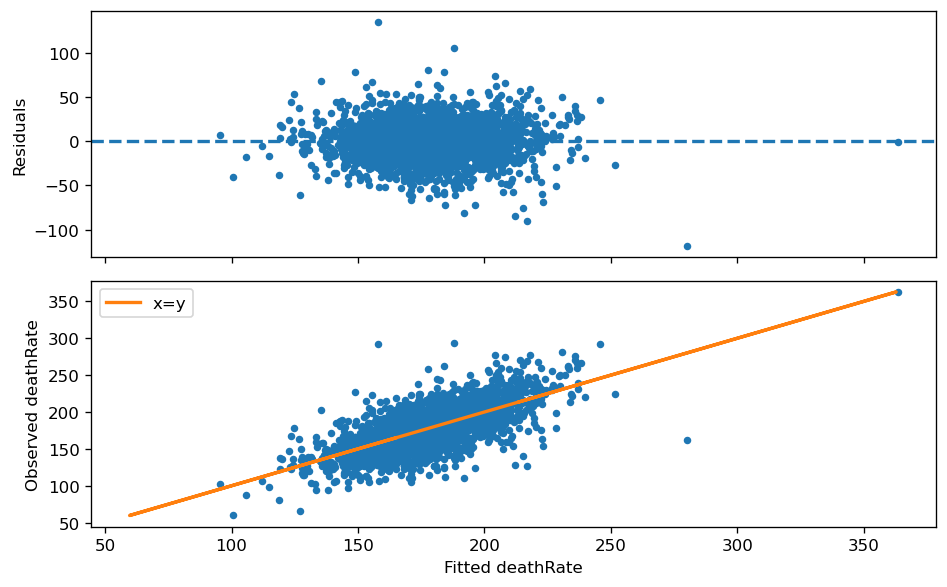

In [20]:
from sklearn.linear_model import LinearRegression
import sklearn.linear_model as sk_lm
linear_model = sk_lm.LinearRegression(fit_intercept=False)

#Regression
n = len(cancer_df.deathRate)
X = np.c_[np.ones(n), cancer_df2] 
reg = linear_model.fit(X, cancer_df.deathRate)
fitted_deathRate = reg.predict(X)
residuals = cancer_df.deathRate - fitted_deathRate

#Plotting residuals and observed data vs fits 
f, (ax1, ax2) = plt.subplots(2, 1, sharex = True)
ax1.plot(fitted_deathRate, residuals,'.')
ax1.set_ylabel("Residuals")
ax1.axhline(y=0, ls='--')

ax2.plot(fitted_deathRate, cancer_df.deathRate,'.')
ax2.plot(cancer_df.deathRate, cancer_df.deathRate,'-',label='x=y')
ax2.set_ylabel("Observed deathRate")
ax2.set_xlabel("Fitted deathRate")
ax2.legend()

plt.tight_layout()

In [21]:
# Calculating the corelation coeffecients and intercepts
coef_names = cancer_df2.columns.tolist()
coef_names.insert(0,'Intercept')
print(np.c_[coef_names,reg.coef_])

# Calculating the root mean square error
print(r'RMSE {:.3f}'.format(rmse(cancer_df.deathRate,fitted_deathRate)))

[['Intercept' '155.8809949045687']
 ['incidenceRate' '0.2132454321135037']
 ['medIncome' '6.00947265389987e-05']
 ['popEst2015' '-3.822995140540846e-06']
 ['povertyPercent' '0.12944637960010122']
 ['PctMarriedHouseholds' '-0.4271911123652128']
 ['PctBachDeg25_Over' '-1.281088416143379']
 ['binnedInc_1' '6.498269394897263']
 ['binnedInc_2' '3.0124336972635093']
 ['binnedInc_3' '0.1091716506689982']
 ['binnedInc_4' '-1.6435766246831889']
 ['binnedInc_5' '-3.078183228424223']
 ['binnedInc_6' '-4.825939456543922']
 ['binnedInc_7' '-8.20189782708065']
 ['binnedInc_8' '-7.410244069552158']
 ['binnedInc_9' '-6.464902646678347']
 ['binnedInc_10' '-5.137597403325015']
 ['modeEdu18_24_SC' '5.525023641658891']
 ['modeEdu18_24_HS' '7.309083195607059']
 ['modeEdu18_24_noHS' '-1.7763568394002505e-15']
 ['modeEdu18_24_BCDG' '5.480816516693102']
 ['modeHI_prv8cvr' '-14.77515025804878']
 ['modeHI_pblccvr' '-12.367316255408811']
 ['IDW_77-90' '-6.308653109355904']
 ['IDW_90-95' '-7.925107344154031']
 ['